# Day 2 - Linear Regression

In [1]:
import tensorflow as tf

### Step 1 - Make a tensor.
What the fuck is a tensor?

In [2]:
myVar = tf.random.uniform([1])
print(myVar)

tf.Tensor([0.8131716], shape=(1,), dtype=float32)


### Step 2 - Convert to something usable using numpy.
Numpy converts things into bare-bones, blazing fast C++ level speed. Super helful for Tensorflow.

In [3]:
myNumpyVar = myVar.numpy()
print(myNumpyVar)

[0.8131716]


### How to get more information?
Adding a question mark is jupyter notebooks poor attempt at kite 

In [4]:
tf?

Type:        module
String form: <module 'tensorflow' from '/Users/michaelbasdeo/opt/anaconda3/lib/python3.7/site-packages/tensorflow/__init__.py'>
File:        ~/opt/anaconda3/lib/python3.7/site-packages/tensorflow/__init__.py
Docstring:   TensorFlow root package


Now, lets make a function that will create 100 random numbers, all between 0 and 1. 
Tensorflow gives us amazing distribution options! (normal, gaussian, poisson). Remember to return numpy.ndarrays for blazing fast c++ speed!

In [5]:
def data_creation(w=0.1, b=0.5, n=100):
    X = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(n,), mean=0.0, stddev=0.01)
    Y = X*w + b + noise
    return X.numpy(), Y.numpy()


X, Y = data_creation(n=100)
print(type(X))

<class 'numpy.ndarray'>


In [6]:
print(len(X))

100


In [7]:
print(len(Y))

100


### Matplotlib inline


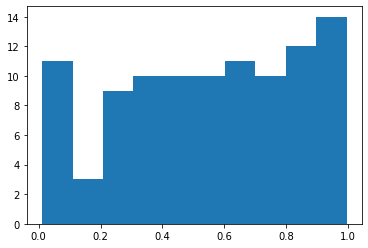

In [15]:
import matplotlib.pyplot as mpl

mpl.hist(X)
mpl.show()

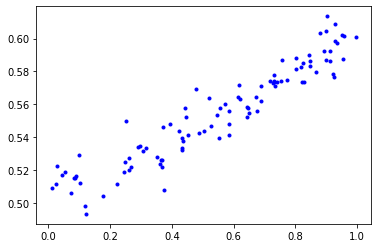

In [9]:

mpl.plot(X, Y, 'b.')
mpl.show()

### The game

Get the red line as close to the green line as possible. You can do this by adjusting the weights and biases until you get 
as close as you can to the actual values (in our case, hard coded into data_creation function)



Solution:

\begin{align}
\ w & = 0.1 \\
\ b & = 0.5 \\
\end{align}

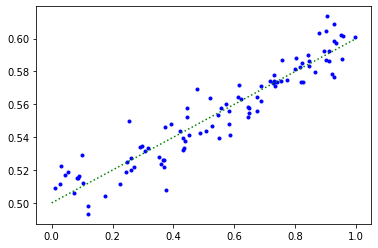

In [10]:
w=0.1
b=0.5
mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b,1*w+b], 'g:')


## Start at 0

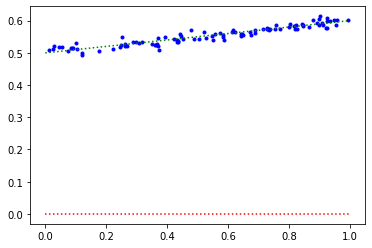

In [11]:
w_guess = 0
b_guess = 0
mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b,1*w+b], 'g:')
mpl.plot([0,1], [0*w_guess+b_guess,1*w_guess+b_guess], 'r:')

### Start playing by creating a predictor function

In [12]:
def predict(x):
    y = w_guess*x + b_guess
    return y

Find the distance between the current blue circle and the red line.

In [13]:
def mean_squared_error(y_pred, Y):

    return tf.reduce_mean(tf.square((y_pred-Y)))


In [14]:
print(mean_squared_error(predict(X), Y))

tf.Tensor(0.30831313, shape=(), dtype=float32)
